In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. 개요

### 분석의 목적

- 배경 및 동기

 산불은 대한민국의 산림을 위협하는 중요한 재해 요인 중 하나로, 환경 파괴와 인명 피해를 초래한다. 대한민국의 기후 조건은 봄과 가을철에 기온이 상승하고 습도가 낮아지는 기후 조건에 의해 산불 발생 위험이 커진다. 이러한 기후 조건에 강한 바람과 건조한 날씨가 더해지면, 산불의 확산이 더욱 가속한다.

이와 관련하여 2024년 4월 14일경 제주도를 제외한 전국 각지에서 산불 경보가 발령되고, 이에 따라 많은 지역에서 화재가 발생하였다. 김포시 월곶면 문수산과 포천시 신북면 야산 등에서는 각각 화재가 발생하였으며, 산림 당국은 헬기와 차량 등 다양한 장비를 동원하여 불을 진화시켰다.

또한, 강원 철원군 김화읍 비무장지대(DMZ)에서도 산불이 발생하여 작지 않은 규모의 진화 작업이 진행되었다. 이러한 산불 사태는 이미 전국적으로 산불재난 국가 위기 경보가 발령된 상황에서 발생하였다. 수도권을 비롯한 일부 지역에는 건조주의보까지 내려져 있었던 상황이었으며, 산불이 발생하기 쉬운 환경이 조성되어 있었다.

해당 산불 사태를 통해 우리는 산림 환경과 산불 발생 간의 관계를 더 깊이 이해하고자 한다. 산림 환경의 변화와 산불 발생 간의 상관관계를 분석하여, 어떤 세부적인 요인이 산불을 유발하고 확산시키는지를 파악하고자 한다. 따라서 이를 통해 산불 예방 및 대응에 필요한 정책 및 조치를 마련하여 더 안전한 산림 환경을 만드는데 기여하고자 한다.

- 연구의 목적과 중요성

  본 연구의 목적은 시간대별, 풍속과 실효습도로 산불 위험을 분석하여 산림 환경의 변화가 산불 발생과 확산에 미치는 영향을 확인하고자 한다. 시간대별로 산불 위험을 분석하여 특정 시간대에 더 높은 위험이 발생하는 경향을 파악할 수 있으며 또한, 풍속과 습도가 변화함에 따라 산불 위험이 어떻게 변하는지를 분석하여 세부적인 요인이 산불 발생에 미치는 영향을 이해할 수 있다.

최종적으로 산림 환경과 산불 위험 간의 상호작용을 시각적으로 분석하고, 미래의 산불 위험을 예측하여 효과적인 산림 관리 및 대응책을 마련하는 데 기여할 것으로 기대된다.

- 연구 구성

  시간대별 대형 산불 위험 예보 추이 분석, 풍속과 실효 습도와의 관계 분석을 더불어 산불에 대한 심층적인 이해를 제공하고자 한다. 이에 산불 발생 대응책의 기반을 마련하고자 하며, 산불 위험 지역을 정확히 파악하여 산불로 인한 피해를 최소화하는 것을 목표로 한다.

## 2. 데이터 수집

### 데이터 출처

산림 환경과 산불 위험 간의 관계를 조사하기 위해 산림청, 기상청, 지리정보원 등의 공공기관에서 제공하는 산불 위험예보 데이터를 활용하였다.

### 수집 방법

공공기관에서 제공하는 API를 활용하거나, 데이터 파일을 다운로드하여 수집하였다.

### 수집된 데이터의 구조 및 특성 설명

수집된 데이터는 날짜, 위치 정보(위도, 경도), 기상 조건(온도, 습도, 바람 등), 지형 정보(고도, 산림 면적 등) 등의 변수를 포함하며, 시간별 또는 일별로 기록하였다.

- 데이터 소스: 산림청 국립산림과학원에서 제공하는 대형 산불 위험 예보 데이터
- 기간: 2017년부터 현재까지의 데이터
- 주요 변수:
    - 시도: 대한민국 내 시/도 (서울, 부산, 대구 등)
    - 시군구: 시/도 내 소속 시군구 (예: 강남구, 중구 등)
    - 읍면동: 시군구 내 소속 읍면동 (예: 청담동, 신사동 등)
    - 시간: 매 시간별로 제공되는 데이터
    - 풍속: 해당 시간의 풍속 정보 (m/s)
    - 실효습도: 해당 시간의 실효습도 정보 (%)
    - 대형 산불 위험 예보: 경보, 주의보로 구분되는 위험 예보 등급

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/wildfire.csv', encoding='euc-kr')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildfire.csv'

In [ ]:
data.head()

,예보일시,시도명,시군구명,읍면동명,실효습도,풍속,등급
0,2017-01-17 15:00,강원도,인제군,북면,34.6,7.3,주의보
1,2017-01-23 11:00,경상북도,포항시 남구,장기면,30.9,7.3,주의보
2,2017-01-24 14:00,전라남도,여수시,경호동,36.2,7.3,주의보
3,2017-01-27 10:00,경상북도,포항시 북구,기계면,34.2,8.4,주의보
4,2017-01-27 10:00,경상북도,경주시,안강읍,34.1,7.8,주의보


In [ ]:
data = data.drop(columns=['시군구명', '읍면동명', '등급'])

In [ ]:
data.head()

,시도명,실효습도,풍속
예보일시,,,
2017-01-17 15:00:00,강원도,34.6,7.3
2017-01-23 11:00:00,경상북도,30.9,7.3
2017-01-24 14:00:00,전라남도,36.2,7.3
2017-01-27 10:00:00,경상북도,34.2,8.4
2017-01-27 10:00:00,경상북도,34.1,7.8


In [ ]:
data.describe()

,실효습도,풍속
count,38706.000000,38706.000000
mean,36.521852,8.001581
std,4.731213,1.460905
min,0.000000,7.000000
25%,33.100000,7.300000
50%,36.700000,7.700000
75%,40.100000,8.400000
max,52.600000,74.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38706 entries, 0 to 38705
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   예보일시    38706 non-null  object 
 1   시도명     38706 non-null  object 
 2   실효습도    38706 non-null  float64
 3   풍속      38706 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
# 중복된 행 확인
duplicates = data[data.duplicated()]

# 중복된 행의 개수 확인
print("중복된 행의 개수:", duplicates.shape[0])

# 중복된 행 출력
print(duplicates)


중복된 행의 개수: 9626
                   예보일시   시도명  실효습도   풍속
95     2017-02-02 12:00  전라남도  32.7  7.2
229    2017-02-10 12:00  경상남도  37.7  7.5
287    2017-02-10 14:00  경상남도  37.3  7.0
618    2017-02-20 15:00  경상북도  38.4  7.7
628    2017-02-20 15:00  경상남도  42.5  8.9
...                 ...   ...   ...  ...
38693  2024-03-22 15:00    경북  38.9  7.0
38694  2024-03-22 15:00    경북  38.9  7.0
38698  2024-03-22 15:00    전북  38.4  7.3
38700  2024-03-22 15:00    전북  38.4  7.3
38705  2024-03-22 16:00    경북  38.9  7.7

[9626 rows x 4 columns]


In [ ]:
#중복 행 제거
data.drop_duplicates(inplace=True)

In [ ]:
#결측치 확인
missing_values = data.isnull().sum()
print(missing_values)

예보일시    0
시도명     0
실효습도    0
풍속      0
dtype: int64


In [ ]:
#이상치 확인 및 제거

# 실효습도의 평균과 표준편차 계산
mean = data['실효습도'].mean()
std_dev = data['실효습도'].std()

# 이상치를 확인할 기준 설정 (예: 평균에서 표준편차의 3배 이상 떨어진 경우)
threshold = 3
lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

# 이상치 확인
outliers = data[(data['실효습도'] < lower_bound) | (data['실효습도'] > upper_bound)]

print("이상치 개수:", outliers.shape[0])
print(outliers)


이상치 개수: 73
                   예보일시   시도명  실효습도    풍속
3549   2017-05-08 21:00   강원도  16.3  11.5
3812   2017-12-05 13:00  전라남도   0.0   7.0
4163   2018-02-11 11:00   강원도   0.0   7.0
5342   2018-12-19 15:00   강원도   6.8  15.5
7614   2019-04-05 01:00    강원  20.9  11.0
...                 ...   ...   ...   ...
26972  2022-02-24 18:00    부산  15.1  33.4
32506  2022-11-03 13:00    전남  18.1   7.1
32507  2022-11-03 13:00    전남  18.1   7.0
36186  2023-04-13 08:00    강원  22.0  11.2
36247  2023-04-13 14:00    강원  21.5  11.4

[73 rows x 4 columns]


In [ ]:
data = data[(data['실효습도'] >= lower_bound) & (data['실효습도'] <= upper_bound)]

In [ ]:
# 풍속의 평균과 표준편차 계산
mean = data['풍속'].mean()
std_dev = data['풍속'].std()

# 이상치를 확인할 기준 설정 (예: 평균에서 표준편차의 3배 이상 떨어진 경우)
threshold = 3
lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

# 이상치 확인
outliers = data[(data['풍속'] < lower_bound) | (data['풍속'] > upper_bound)]

print("이상치 개수:", outliers.shape[0])
print(outliers)

이상치 개수: 248
                   예보일시  시도명  실효습도    풍속
2601   2017-04-30 09:00  강원도  26.6  12.9
5430   2019-03-14 11:00  강원도  25.3  14.0
7606   2019-04-05 01:00   강원  23.5  13.7
7607   2019-04-05 01:00   강원  23.4  13.2
7613   2019-04-05 01:00   강원  23.4  13.3
...                 ...  ...   ...   ...
37132  2024-03-15 14:00   강원  31.3  18.0
37141  2024-03-15 15:00   강원  33.3  33.8
37168  2024-03-15 16:00   강원  33.2  33.3
37186  2024-03-15 17:00   강원  33.2  33.7
37206  2024-03-15 18:00   강원  33.2  33.2

[248 rows x 4 columns]


In [ ]:
data = data[(data['풍속'] >= lower_bound) & (data['풍속'] <= upper_bound)]

NameError: name 'data' is not defined

In [ ]:
#전처리 완료
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 28759 entries, 0 to 38704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   예보일시    28759 non-null  object 
 1   시도명     28759 non-null  object 
 2   실효습도    28759 non-null  float64
 3   풍속      28759 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 리스트
fonts = fm.findSystemFonts()

# 폰트 이름만 추출
font_names = [fm.FontProperties(fname=fname).get_name() for fname in fonts]

print(font_names)

['Liberation Sans', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Serif', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Mono']


In [ ]:
!apt-get update -qq
!apt-get install -y fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumGothic')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 50 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.1 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


Streaming output truncated to the last 5000 lines.


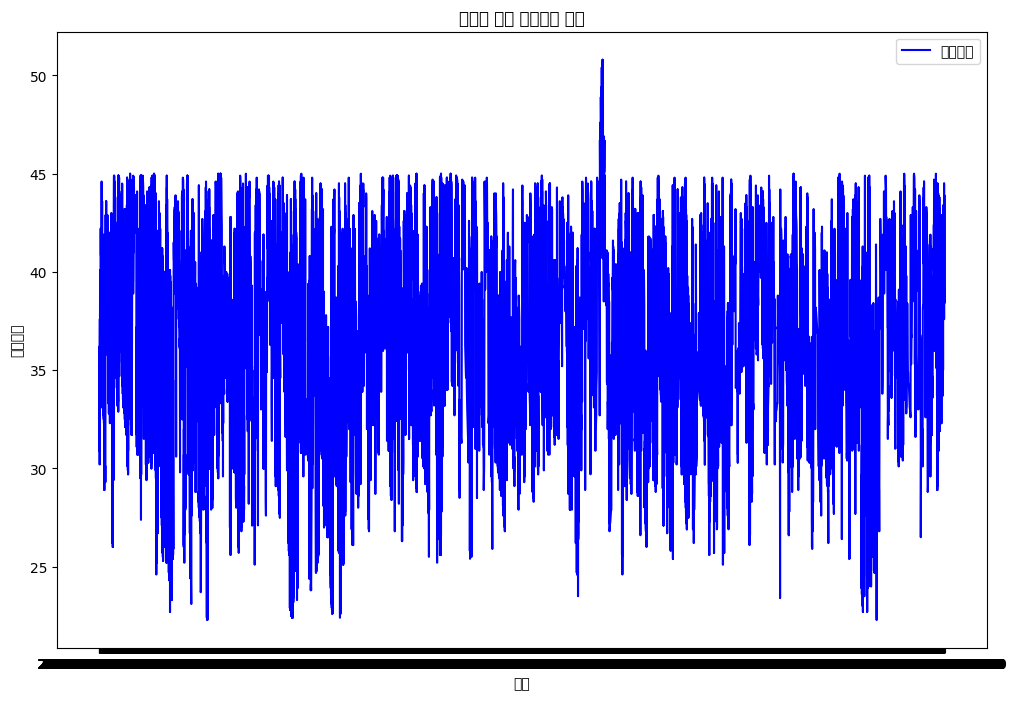

Streaming output truncated to the last 5000 lines.


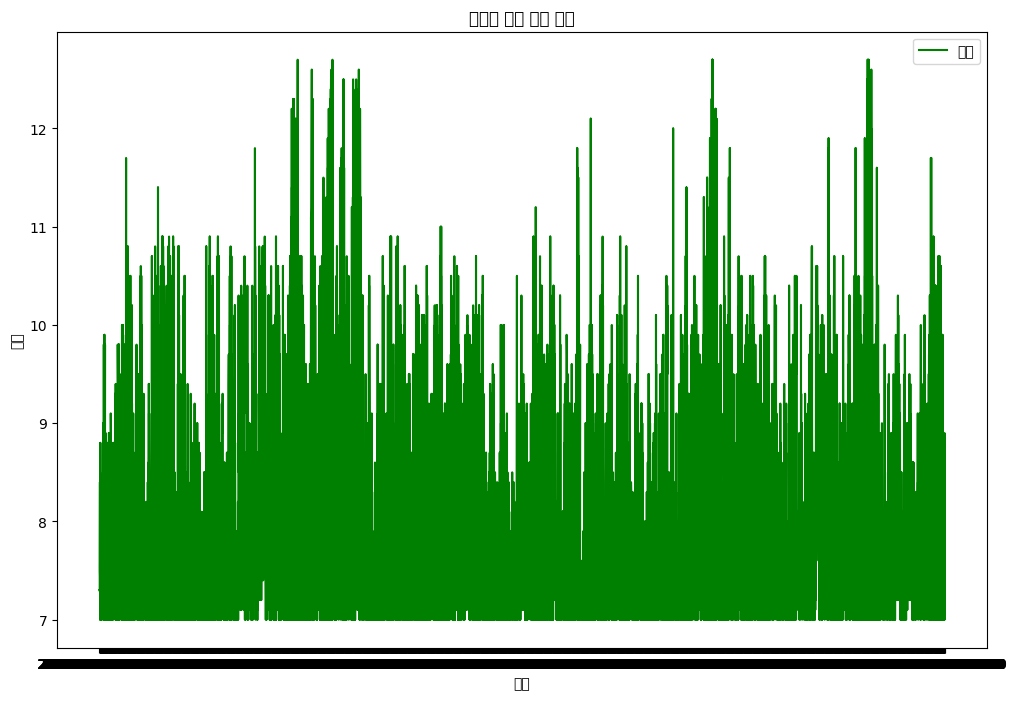

In [ ]:
import matplotlib.pyplot as plt

# '예보일시' 열을 날짜와 시간으로 변환
plt.rc('font', family='NanumGothic')

# '예보일시'를 인덱스로 설정
data.set_index('예보일시', inplace=True)

# 시간에 따른 실효습도 그래프
plt.figure(figsize=(12, 8))
plt.plot(data['실효습도'], color='blue', label='실효습도')
plt.title('시간에 따른 실효습도 변화')
plt.xlabel('날짜')
plt.ylabel('실효습도')
plt.legend()
plt.show()

# 시간에 따른 풍속 그래프
plt.figure(figsize=(12, 8))
plt.plot(data['풍속'], color='green', label='풍속')
plt.title('시간에 따른 풍속 변화')
plt.xlabel('날짜')
plt.ylabel('풍속')
plt.legend()
plt.show()


In [ ]:
data.reset_index(inplace=True)
data['예보일시'] = data['예보일시'].astype(str)

In [ ]:
data.head()

,예보일시,시도명,실효습도,풍속
0,2017-01-17 15:00:00,강원도,34.6,7.3
1,2017-01-23 11:00:00,경상북도,30.9,7.3
2,2017-01-24 14:00:00,전라남도,36.2,7.3
3,2017-01-27 10:00:00,경상북도,34.2,8.4
4,2017-01-27 10:00:00,경상북도,34.1,7.8


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


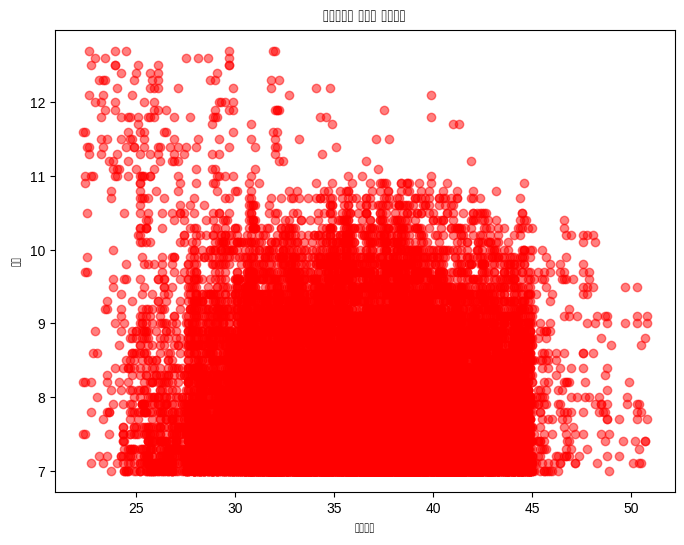

In [ ]:
# 실효습도와 풍속의 상관관계 산점도
plt.figure(figsize=(8, 6))
plt.scatter(data['실효습도'], data['풍속'], color='red', alpha=0.5)
plt.title('실효습도와 풍속의 상관관계')
plt.xlabel('실효습도')
plt.ylabel('풍속')
plt.show()
